In [1]:
import pandas as pd
import numpy as np
import torch
import os
import hdbscan

from utils import drop_skewed_features, drop_correlated_features
from aencoder import Autoencoder
from aencoder import train_autoencoder, get_latent_representation

random_seed = 0

/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/d

## Load in dataset and opt parameters

In [2]:
dataset_5 = pd.read_csv('/Users/leo/Programming/PLR/Leo/data/dataset_5.csv').drop('Unnamed: 0', axis=1)

opt_params = {
    'skew_threshold': 0.8,
    'corr_threshold': 0.5,
    'hidden_size': 64, 
    'latent_dim': 2, 
    'learning_rate': 0.01, 
    'epochs': 500, 
    'hdbscan_params': {
        'min_cluster_size': 5, 
        'min_samples': 25
        }
    }

## Drop features based off opt thresholds

In [4]:
data_unskewed = drop_skewed_features(dataset_5, opt_params['skew_threshold'])
data_drop_corr = drop_correlated_features(data_unskewed, opt_params['corr_threshold'])

Dropping features with skewness > 0.8 and correlation > 0.5


## Convert to torch tensors

In [5]:
tensor_data = torch.tensor(data_drop_corr.values, dtype=torch.float32)

In [6]:
print(f"Initializing Autoencoder with input size {tensor_data.shape[1]}, hidden size {opt_params['hidden_size']} and latent dim {opt_params['latent_dim']}")
autoencoder_model = Autoencoder(input_size=tensor_data.shape[1], hidden_size=opt_params['hidden_size'], latent_dim=opt_params['latent_dim'])

trained_model = train_autoencoder(autoencoder_model, tensor_data, opt_params['learning_rate'], opt_params['epochs'], random_seed)
data_encoded = get_latent_representation(trained_model, tensor_data)

Initializing Autoencoder with input size 55, hidden size 64 and latent dim 2


## Visualize embedding

In [8]:
data_encoded[:5]

tensor([[1.4741, 0.8847],
        [1.7707, 0.9189],
        [1.5621, 1.7105],
        [1.7359, 0.0925],
        [0.3761, 0.6221]])

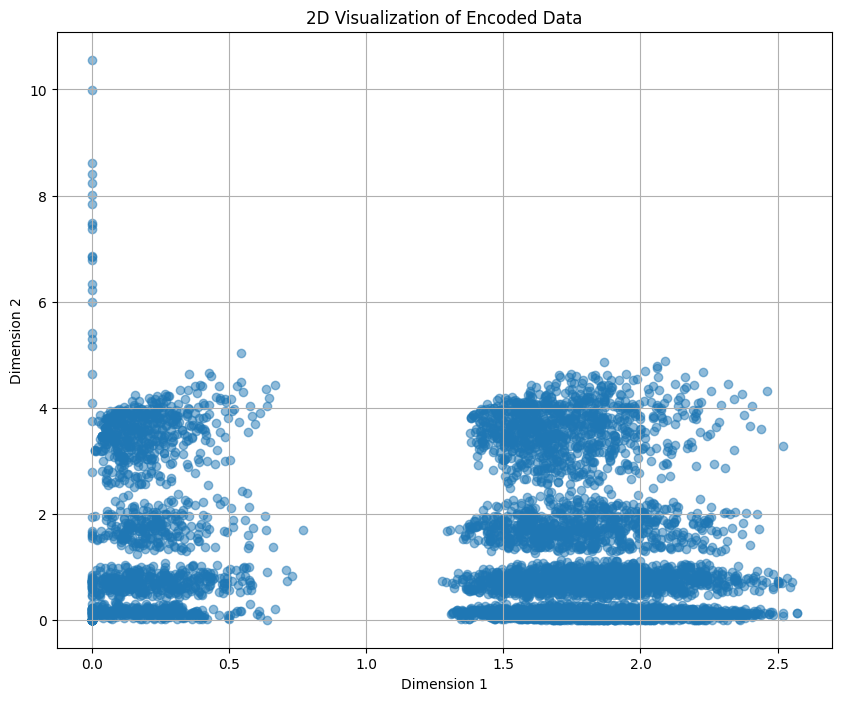

In [9]:
import matplotlib.pyplot as plt

# Assuming data_encoded is your encoded data as a numpy array with shape (6031, 2)
x = data_encoded[:, 0]  # First dimension as x
y = data_encoded[:, 1]  # Second dimension as y

plt.figure(figsize=(10, 8))
plt.scatter(x, y, alpha=0.5)  # Scatter plot, adjust alpha for point transparency

plt.title('2D Visualization of Encoded Data')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)

# Optionally, if you have labels, you can color code the points based on labels.
# For example: plt.scatter(x, y, c=labels, alpha=0.5)

plt.show()
